# Exploration of the prospective mobile deals

**The goal of the research** is to do the research on mobile operator:
1. Describtion of customer behavior:
* number and duration of calls
* number of text messages
* internet traffic

2. Test the hypothesis:
* average revenue from "Ultra" and "Smart" mobile deals is different
*  average revenue from clients living in Moscow and other regions is defferent

  **Initial data**

The initial data is extracted from files.
* `calls.csv` - duration and date of calls
* `internet.csv` - internet traffic and date of connection
* `messages.csv` - number and date of text messages
* `tariffs.csv` - types of proposed tariffs
* `users.csv` - information about clients

The research is divided into five steps:
   1. Data overview 
   2. Pre-processing
   3. Adding new attributes
   4. Performing In-depth analysis
   5. Test the hypothesis

### Step 1. Data overview

In [1]:
# import libraries
import pandas as pd
import numpy as np
from scipy import stats as st
import calendar
import random
from matplotlib import pyplot as plt

In [2]:
# set up an option to show one decimal place
pd.options.display.float_format = '{:.1f}'.format

In [3]:
# read csv file and print our 5 rows
try:
    df_calls = pd.read_csv('/datasets/calls.csv')
except:  
    df_calls = pd.read_csv('C:/YandexPracticumProjects/Project_4_MobileNetwork/calls.csv')

display(df_calls.head())

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.0,1000
1,1000_1,2018-08-17,0.0,1000
2,1000_2,2018-06-11,2.9,1000
3,1000_3,2018-09-21,13.8,1000
4,1000_4,2018-12-15,5.2,1000


In [4]:
df_calls.info() # general info about 'calls.csv'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [5]:
# read 'internet.csv' and print our 5 rows
try:
    df_internet = pd.read_csv('/datasets/internet.csv')
except:  
    df_internet = pd.read_csv('C:/YandexPracticumProjects/Project_4_MobileNetwork/internet.csv')

display(df_internet.head())

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,113.0,2018-11-25,1000
1,1,1000_1,1052.8,2018-09-07,1000
2,2,1000_2,1197.3,2018-06-25,1000
3,3,1000_3,550.3,2018-08-22,1000
4,4,1000_4,302.6,2018-09-24,1000


In [6]:
df_internet.info() # general info about 'internet.csv'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


In [7]:
# read 'messages.csv' and print our 5 rows
try:
    df_messages = pd.read_csv('/datasets/messages.csv')
except:  
    df_messages = pd.read_csv('C:/YandexPracticumProjects/Project_4_MobileNetwork/messages.csv')

display(df_messages.head())

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [8]:
df_messages.info() # general info about 'messages.csv'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [9]:
# read 'tariffs.csv' and print our 5 rows
try:
    df_tariffs = pd.read_csv('/datasets/tariffs.csv')
except:  
    df_tariffs = pd.read_csv('C:/YandexPracticumProjects/Project_4_MobileNetwork/tariffs.csv')

display(df_tariffs.head())

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [10]:
df_tariffs.info() # general info about 'tariffs.csv'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


In [11]:
# read 'users.csv' and print our 5 rows
try:
    df_users = pd.read_csv('/datasets/users.csv')
except:  
    df_users = pd.read_csv('C:/YandexPracticumProjects/Project_4_MobileNetwork/users.csv')

display(df_users.head())

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


In [12]:
df_users.info() # general info about 'users.csv'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [13]:
# number of rows before data cleaning
df_calls_init = len(df_calls.index)
df_internet_init = len(df_internet.index)
df_messages_init = len(df_messages.index)
df_users_init = len(df_users.index)

print('Number of rows in "calls" before data cleaning:', df_calls_init)
print('Number of rows in "internet" before data cleaning:', df_internet_init)
print('Number of rows in "messages" before data cleaning:', df_messages_init)
print('Number of rows in "users" before data cleaning:', df_users_init)

Number of rows in "calls" before data cleaning: 202607
Number of rows in "internet" before data cleaning: 149396
Number of rows in "messages" before data cleaning: 123036
Number of rows in "users" before data cleaning: 500


In [14]:
# check for NaN values in 'calls.csv'  
df_calls.isna().sum()

id           0
call_date    0
duration     0
user_id      0
dtype: int64

In [15]:
# check for NaN values in 'internet.csv'
df_internet.isna().sum()

Unnamed: 0      0
id              0
mb_used         0
session_date    0
user_id         0
dtype: int64

In [16]:
# check for NaN values in 'messages.csv'
df_messages.isna().sum()

id              0
message_date    0
user_id         0
dtype: int64

In [17]:
# check for NaN values in 'users.csv'
df_users.isna().sum()

user_id         0
age             0
churn_date    462
city            0
first_name      0
last_name       0
reg_date        0
tariff          0
dtype: int64

In [18]:
# check for duplicates
print('Number of duplicates in "calls":', (df_calls.duplicated().sum()))
print('Number of duplicates in "internet":', (df_internet.duplicated().sum()))
print('Number of duplicates in "messages":', (df_messages.duplicated().sum()))
print('Number of duplicates in "users":', (df_users.duplicated().sum()))

Number of duplicates in "calls": 0
Number of duplicates in "internet": 0
Number of duplicates in "messages": 0
Number of duplicates in "users": 0


### Step 2. Pre-processing

In [19]:
# convert data from 'object' into 'datetime64'
df_calls['call_date'] = pd.to_datetime(df_calls['call_date'], format='%Y-%m-%d')
df_internet['session_date'] = pd.to_datetime(df_internet['session_date'], format='%Y-%m-%d')
df_messages['message_date'] = pd.to_datetime(df_messages['message_date'], format='%Y-%m-%d')
df_users['reg_date'] = pd.to_datetime(df_users['reg_date'], format='%Y-%m-%d')

In [20]:
# drop the column with 'Unnamed: 0' in 'df_internet'
df_internet.drop(df_internet.columns[0], axis=1, inplace=True)

In [21]:
# replace NaN with NaT in 'churn_date'
df_users['churn_date'] = df_users['churn_date'].astype(np.datetime64).fillna(pd.NaT)

In [22]:
# name of dataframes
data_names = ['calls', 'internet', 'messages', 'users']

# calculation of percentage of rows left after data cleaning
def data_preproc(data_init, data_result, df_names):
    
    # number of rows after the filter applied
    df_preprocessed = len(data_result.index)

    # percantage of rows after the filter applied
    prop_data = df_preprocessed / data_init
    percent_prop_data = '{:.0%}'.format(prop_data)
    text = 'Rows left after data cleaning "{}" ='.format(df_names)
    print(text, percent_prop_data)

In [23]:
# print out percentage of data left after pre-processing
data_preproc(df_calls_init, df_calls, data_names[0])
data_preproc(df_internet_init, df_internet, data_names[1])
data_preproc(df_messages_init, df_messages, data_names[2])
data_preproc(df_users_init, df_users, data_names[3])

Rows left after data cleaning "calls" = 100%
Rows left after data cleaning "internet" = 100%
Rows left after data cleaning "messages" = 100%
Rows left after data cleaning "users" = 100%


### Step 3. Adding new attributes

In [24]:
# create new columns 'month' and 'month_name' in 'df_calls'
df_calls['month'] = pd.DatetimeIndex(df_calls['call_date']).month
df_calls['month_name'] = df_calls['month'].apply(lambda x: calendar.month_abbr[x])

In [25]:
# create new columns 'month' and 'month_name' in 'df_internet'
df_internet['month'] = pd.DatetimeIndex(df_internet['session_date']).month
df_internet['month_name'] = df_internet['month'].apply(lambda x: calendar.month_abbr[x])

In [26]:
# create new column 'gb_used' in 'df_internet'
df_internet['gb_used'] = df_internet['mb_used'] / 1024

In [27]:
# create new columns 'month' and 'month_name' in 'df_messages'
df_messages['month'] = pd.DatetimeIndex(df_messages['message_date']).month
df_messages['month_name'] = df_messages['month'].apply(lambda x: calendar.month_abbr[x])

In [28]:
# create new column 'gb_per_month_included' on 'df_users'
df_tariffs['gb_per_month_included'] = df_tariffs['mb_per_month_included'] / 1024

In [29]:
# filter 'df_users' by mobile tariffs
df_users_smart = df_users.query('tariff == "smart"')
df_users_ultra = df_users.query('tariff == "ultra"')

***

Filter data on clients having 'Smart' mobile tariff 

In [30]:
# create a table of calls record for users having 'Smart' mobile tariff
cond_calls_smart = df_calls['user_id'].isin(df_users_ultra['user_id'])
df_calls_smart = df_calls.drop(df_calls[cond_calls_smart].index, inplace = False)

# create a table of internet activities for users having 'Smart' mobile tariff
cond_internet_smart = df_internet['user_id'].isin(df_users_ultra['user_id'])
df_internet_smart = df_internet.drop(df_internet[cond_internet_smart].index, inplace = False)

# create a table of messages record for users having 'Smart' mobile tariff
cond_messages_smart = df_messages['user_id'].isin(df_users_ultra['user_id'])
df_messages_smart = df_messages.drop(df_messages[cond_messages_smart].index, inplace = False)

Filter data on clients having 'Ultra' mobile tariff  

In [31]:
# create a table of calls record for users having 'Ultra' mobile tariff 
cond_calls_ultra = df_calls['user_id'].isin(df_users_smart['user_id'])
df_calls_ultra = df_calls.drop(df_calls[cond_calls_ultra].index, inplace = False)

# create a table of internet activities for users having 'Ultra' mobile tariff 
cond_internet_ultra = df_internet['user_id'].isin(df_users_smart['user_id'])
df_internet_ultra = df_internet.drop(df_internet[cond_internet_ultra].index, inplace = False)

# create a table of messages record for users having 'Ultra' mobile tariff 
cond_messages_ultra = df_messages['user_id'].isin(df_users_smart['user_id'])
df_messages_ultra = df_messages.drop(df_messages[cond_messages_ultra].index, inplace = False)

***

Calculation of parameters for tariffss

In [32]:
# parameters for calculation 
parameter = ['id', 'duration', 'gb_used']
# functions for calculation
function = ['count', 'sum']

# function to build new table
def param_calc(data, param, func):

    # build a table based on defined parameters and functions
    df_param = data.pivot_table(
    index=['user_id'], 
    columns=['month', 'month_name'], 
    values=param, 
    aggfunc=func, 
    fill_value=0
    )
    return df_param

***

Tables with investigating parameters for 'Smart' mobile tariff

In [33]:
# number of calls made by months for 'Smart' mobile tariff 
df_calls_amount_smart = param_calc(df_calls_smart, parameter[0], function[0])
display(df_calls_amount_smart.head())

month,1,2,3,4,5,6,7,8,9,10,11,12
month_name,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
user_id,,,,,,,,,,,,
1001,0,0,0,0,0,0,0,0,0,0,59,63
1002,0,0,0,0,0,15,26,42,36,33,32,33
1005,15,69,77,101,73,80,77,71,66,100,75,84
1006,0,3,46,47,56,53,49,42,54,44,62,50
1007,0,0,0,25,67,68,69,74,87,69,81,72


In [34]:
# number of minutes spent by months  for 'Smart' mobile tariff
df_calls_duration_smart = param_calc(df_calls_smart, parameter[1], function[1])
display(df_calls_duration_smart.head())

month,1,2,3,4,5,6,7,8,9,10,11,12
month_name,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
user_id,,,,,,,,,,,,
1001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,408.1,391.3
1002,0.0,0.0,0.0,0.0,0.0,110.4,204.8,269.7,195.8,199.5,228.0,223.0
1005,90.9,426.7,573.5,670.2,565.6,577.6,536.4,586.8,447.2,684.9,523.3,559.4
1006,0.0,40.2,268.1,332.3,346.4,455.1,299.8,258.6,334.1,249.9,348.3,356.5
1007,0.0,0.0,0.0,187.1,448.0,519.0,552.0,431.8,619.9,437.3,546.7,397.8


In [35]:
# total internet traffic spent by months (Gb) for 'Smart' mobile tariff
df_internet_amount_smart = param_calc(df_internet_smart, parameter[2], function[1])
display(df_internet_amount_smart.head())

month,1,2,3,4,5,6,7,8,9,10,11,12
month_name,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
user_id,,,,,,,,,,,,
1001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.0,13.7
1002,0.0,0.0,0.0,0.0,0.0,10.6,17.2,19.8,16.3,13.6,18.2,17.7
1005,2.7,7.2,10.8,9.1,7.7,9.6,7.5,7.4,6.9,7.6,12.4,8.5
1006,0.0,1.4,16.9,13.6,12.7,12.1,19.5,18.9,15.2,19.2,12.9,18.0
1007,0.0,0.0,0.0,7.8,17.3,13.3,15.3,20.2,12.3,14.1,16.0,12.2


In [36]:
# number of text messages sent by months for 'Smart' mobile tariff
df_messages_amount_smart = param_calc(df_messages_smart, parameter[0], function[0])
display(df_messages_amount_smart.head())

month,1,2,3,4,5,6,7,8,9,10,11,12
month_name,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
user_id,,,,,,,,,,,,
1002,0,0,0,0,0,4,11,13,4,10,16,12
1005,7,38,56,41,42,47,56,64,52,44,51,54
1007,0,0,0,11,39,26,26,27,31,18,21,26
1008,0,0,0,0,0,0,0,0,0,0,0,56
1009,0,0,2,14,7,14,14,9,12,15,11,12


***

Tables with investigating parameters for 'Ultra' mobile tariff



In [37]:
# number of calls made by months for 'Ultra' mobile tariff 
df_calls_amount_ultra = param_calc(df_calls_ultra, parameter[0], function[0])
display(df_calls_amount_ultra.head())

month,1,2,3,4,5,6,7,8,9,10,11,12
month_name,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
user_id,,,,,,,,,,,,
1000,0,0,0,0,22,43,47,52,58,57,43,46
1003,0,0,0,0,0,0,0,55,134,108,115,108
1004,0,0,0,0,9,31,22,19,26,29,19,21
1013,0,0,0,0,0,0,0,0,0,0,52,90
1016,0,0,0,0,0,0,0,0,0,0,4,16


In [38]:
# number of minutes spent by months  for 'Ultra' mobile tariff
df_calls_duration_ultra = param_calc(df_calls_ultra, parameter[1], function[1])
display(df_calls_duration_ultra.head())

month,1,2,3,4,5,6,7,8,9,10,11,12
month_name,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
user_id,,,,,,,,,,,,
1000,0.0,0.0,0.0,0.0,150.1,158.9,318.8,389.9,440.1,328.4,319.0,313.0
1003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,355.7,904.9,809.1,775.4,755.5
1004,0.0,0.0,0.0,0.0,32.3,159.1,124.4,128.0,110.6,133.6,109.7,123.5
1013,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,349.9,537.8
1016,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26.1,88.8


In [39]:
# total internet traffic spent by months (Gb) for 'Ultra' mobile tariff
df_internet_amount_ultra = param_calc(df_internet_ultra, parameter[2], function[1])
display(df_internet_amount_ultra.head())

month,1,2,3,4,5,6,7,8,9,10,11,12
month_name,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
user_id,,,,,,,,,,,,
1000,0.0,0.0,0.0,0.0,2.2,22.7,13.7,13.7,14.2,14.4,14.4,9.6
1003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.4,12.2,14.4,11.1,9.9
1004,0.0,0.0,0.0,0.0,13.1,17.2,21.7,27.9,14.8,18.0,15.3,17.6
1013,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.6,20.3
1016,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.2,19.0


In [40]:
# number of text messages sent by months for 'Ultra' mobile tariff
df_messages_amount_ultra = param_calc(df_messages_ultra, parameter[0], function[0])
display(df_messages_amount_ultra.head())

month,1,2,3,4,5,6,7,8,9,10,11,12
month_name,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
user_id,,,,,,,,,,,,
1000,0,0,0,0,22,60,75,81,57,73,58,70
1003,0,0,0,0,0,0,0,37,91,83,94,75
1004,0,0,0,0,95,134,181,151,146,165,158,162
1013,0,0,0,0,0,0,0,0,0,0,17,25
1016,0,0,0,0,0,0,0,0,0,0,39,103


***

Calculation of revenue for 'Smart' mobile tariff

In [41]:
# difference between minutes for free and spent for 'Smart' mobile tariff
df_diff_calls_smart = df_tariffs.loc[0, 'minutes_included'] - df_calls_duration_smart 
# calculation monthly ravenue from calls for 'Smart' mobile tariff
df_revenue_calls_smart = abs(df_diff_calls_smart[(df_diff_calls_smart[:] < 0)]\
* df_tariffs.loc[0, 'rub_per_message']).fillna(0)

# difference between internet traffic for free and spent for 'Smart' mobile tariff
df_diff_internet_smart = df_tariffs.loc[0, 'gb_per_month_included'] - df_internet_amount_smart 
# calculation of monthly renenue from internet traffic for 'Smart' mobile traiff
df_revenue_internet_smart = abs(df_diff_internet_smart[(df_diff_internet_smart[:] < 0)]\
* df_tariffs.loc[0, 'rub_per_gb']).fillna(0)

# difference between number of text messages for free and sent for 'Smart' mobile tariff
df_diff_messages_smart = df_tariffs.loc[0, 'messages_included'] - df_messages_amount_smart 
# calculation of monthly revenue from text messages for 'Smart' mobile tariff
df_revenue_messages_smart = abs(df_diff_messages_smart[(df_diff_messages_smart[:] < 0)]\
* df_tariffs.loc[0, 'rub_per_message']).fillna(0)

In [42]:
# total revenue by months for 'Smart' mobile tariff
df_revenue_total_smart = (
df_revenue_calls_smart\
+ df_revenue_internet_smart\
+ df_revenue_messages_smart\
+ df_tariffs.loc[0, 'rub_monthly_fee'])\
.fillna(0)

display(df_revenue_total_smart.head())

month,1,2,3,4,5,6,7,8,9,10,11,12
month_name,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
user_id,,,,,,,,,,,,
1001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1002,550.0,550.0,550.0,550.0,550.0,550.0,983.6,1518.6,810.0,550.0,1180.3,1087.8
1005,550.0,550.0,788.6,1060.6,746.9,782.7,677.3,852.4,556.0,1104.7,623.0,740.3
1006,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1007,550.0,550.0,550.0,550.0,1004.5,606.9,764.0,1593.0,909.8,550.0,887.2,550.0


***

Calculation of revenue for 'Ulta' mobile tariff

In [43]:
# difference between minutes for free and spent for 'Ultra' mobile tariff
df_diff_calls_ultra = df_tariffs.loc[1, 'minutes_included'] - df_calls_duration_ultra 
# calculation monthly ravenue from calls for 'Ultra' mobile tariff
df_revenue_calls_ultra = abs(df_diff_calls_ultra[(df_diff_calls_ultra[:] < 0)]\
* df_tariffs.loc[1, 'rub_per_message']).fillna(0)

# difference between internet traffic for free and spent for 'Ultra' mobile tariff
df_diff_internet_ultra = df_tariffs.loc[1, 'gb_per_month_included'] - df_internet_amount_ultra 
# calculation of monthly renenue from internet traffic for 'Ultra' mobile traiff
df_revenue_internet_ultra = abs(df_diff_internet_ultra[(df_diff_internet_ultra[:] < 0)]\
* df_tariffs.loc[1, 'rub_per_gb']).fillna(0)

# difference between number of text messages for free and sent for 'Ultra' mobile tariff
df_diff_messages_ultra = df_tariffs.loc[1, 'messages_included'] - df_messages_amount_ultra 
# calculation of monthly revenue from text messages for 'Ultra' mobile tariff
df_revenue_messages_ultra = abs(df_diff_messages_ultra[(df_diff_messages_ultra[:] < 0)]\
* df_tariffs.loc[1, 'rub_per_message']).fillna(0)                         

In [44]:
# total revenue by months for 'Ultra' mobile tariff
df_revenue_total_ultra = (
df_revenue_calls_ultra\
+ df_revenue_internet_ultra\
+ df_revenue_messages_ultra\
+ df_tariffs.loc[1, 'rub_monthly_fee'])\
.fillna(0)

display(df_revenue_total_ultra.head())

month,1,2,3,4,5,6,7,8,9,10,11,12
month_name,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
user_id,,,,,,,,,,,,
1000,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0
1003,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0
1004,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0
1013,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0
1016,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0


***

Combined data on clients and services they use by tariffs

In [45]:
# new columns with average values 
columns_avg = [
'calls_amount_avg',
'calls_duration_avg',
'internet_avg',
'messages_avg',
'revenue_avg']

# combined data on clients and services they use
def data_combined (user_data, data_filtr, new_column):
    df_merged = pd.merge(user_data, data_filtr, on="user_id", how='inner')
    df_merged[new_column] = df_merged.iloc[:, 10:20].mean(axis=1)
    return df_merged

In [82]:
# combined data on clients and number of calls for 'Smart' mobile tariff
df_users_calls_amt_smart = data_combined(df_users, df_calls_amount_smart, columns_avg[0])
#display(df_users_calls_amt_smart.head())

# combined data on clients and duration of  calls for 'Smart' mobile tariff
df_users_calls_dur_smart = data_combined(df_users, df_calls_duration_smart, columns_avg[1])
#display(df_users_calls_amt_smart.head())

# combined data on clients and internet traffic for 'Smart' mobile tariff
df_users_internet_smart = data_combined(df_users, df_internet_amount_smart, columns_avg[2])
#display(df_users_internet_smart.head())

# combined data on clients and number of text messages for 'Smart' mobile tariff
df_users_messages_smart = data_combined(df_users, df_messages_amount_smart, columns_avg[3])
#display(df_users_messages_smart.head())

# combined data on clients and total revenue for 'Smart' mobile tariff
df_users_revenue_smart = data_combined(df_users, df_revenue_total_smart, columns_avg[4])
#display(df_users_revenue_smart.head())

###########################################################################################

# combined data on clients and number of calls for 'SUltra' mobile tariff
df_users_calls_amt_ultra = data_combined(df_users, df_calls_amount_ultra, columns_avg[0])
#display(df_users_calls_amt_smart.head())

# combined data on clients and duration of  calls for 'Smart' mobile tariff
df_users_calls_dur_ultra = data_combined(df_users, df_calls_duration_ultra, columns_avg[1])
#display(df_users_calls_amt_smart.head())

# combined data on clients and internet traffic for 'Ultra' mobile tariff
df_users_internet_ultra = data_combined(df_users, df_internet_amount_ultra, columns_avg[2])
#display(df_users_internet_smart.head())

# combined data on clients and number of text messages for 'Ultra' mobile tariff
df_users_messages_ultra = data_combined(df_users, df_messages_amount_ultra, columns_avg[3])
#display(df_users_messages_smart.head())

# combined data on clients and total revenue for 'Ultra' mobile tariff
df_users_revenue_ultra = data_combined(df_users, df_revenue_total_ultra, columns_avg[4])
#display(df_users_revenue_ultra.head())

***

Bilding new data for testing hypothesis

In [47]:
# combine data on users and total revenue for both tariffsо
df_users_revenue_joint = pd.merge(
df_users_revenue_smart, df_users_revenue_ultra, how="outer")

# new column 'location'
df_users_revenue_joint['location'] = df_users_revenue_joint['city']

# fill in 'location' with names from location
# if not 'Москва' replace withа 'Other' 
df_users_revenue_joint['location'] = df_users_revenue_joint['location']\
.where(df_users_revenue_joint['city'] == 'Москва', 'Other')

# filter name of cities and build new dataframes
df_users_revenue_msc = df_users_revenue_joint.query('location == "Москва"')
df_users_revenue_oth = df_users_revenue_joint.query('location == "Other"')

In [48]:
# table for testing hypotises on average revenue in Moscow
df_users_revenue_msc_anal = df_users_revenue_msc[['revenue_avg']]
display(df_users_revenue_msc_anal.head())   

,revenue_avg
0,0.0
4,796.5
21,600.5
23,1310.8
28,602.7


In [49]:
# table for testing hypotises on average revenue in region
df_users_revenue_oth_anal = df_users_revenue_oth[['revenue_avg']]
display(df_users_revenue_oth_anal.head())

,revenue_avg
1,833.0
2,793.2
3,0.0
5,551.8
6,1223.0


In [50]:
# table for testing hypotises on average revenue for 'Smart' mobile tariff
df_users_revenue_smart_anal = df_users_revenue_smart[['revenue_avg']]
df_users_revenue_smart_anal.head()

,revenue_avg
0,0.0
1,833.0
2,793.2
3,0.0
4,796.5


In [51]:
# table for testing hypotises on average revenue for 'Ultra' mobile tariff
df_users_revenue_ultra_anal = df_users_revenue_ultra[['revenue_avg']]
df_users_revenue_ultra_anal.head()

,revenue_avg
0,1950.0
1,1950.0
2,1950.0
3,1950.0
4,1950.0


***

### Step 4. In-depth data analysis

Function for building tables to compare between tariff

In [52]:
# name of tables
title_graph = [
'Comparison of Mobile phone deals: Amount of calls',
'Comparison of Mobile phone deals: Duration of calls',
'Comparison of Mobile phone deals: Internet traffic',
'Comparison of Mobile phone deals: Amount of messages',
'Comparison of Mobile phone deals: Revenue from calls',
'Comparison of Mobile phone deals: Revenue from internet',
'Comparison of Mobile phone deals: Revenue from messages',
'Comparison of Mobile phone deals: Total revenue',
'Total revenue by tariff',
'Total revenue by city']

# valiues in 'y' axis
ylable_graph = [
'Amount of calls',
'Duration of calls (min)',
'Internet traffic (Gb)',
'Amount of messages',
'Revenue from calls (rub)',
'Revenue from internet (rub)',
'Revenue from messages (rub)',
'Total revenue (rub)']

# building tables of services used by months
def compar_results_graph(data_smart, data_ultra, title, ylable, coord_ultra, coord_smart):

    # average value by months
    data_smart_table = data_smart.loc[:].mean()
    data_ultra_table = data_ultra.loc[:].mean()

    ax = data_ultra_table.plot(kind='line', linewidth=2, style="-D", label='ultra')

    data_smart_table.plot(
    kind='line', linewidth=2, style="-o", xticks=range(0, 12),  
    figsize=(12, 5), title=title, xlabel='Month', ylabel=ylable,
    use_index=True, grid=True, ax=ax);   
    
    plt.annotate(
    'ULTRA', xy=coord_ultra,  ha='center', color='blue',
    bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.3)); 

    plt.annotate(
    'SMART', xy=coord_smart,  ha='center', color='red',
    bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.3));

    plt.show()

***

Comparison of services used by clients 

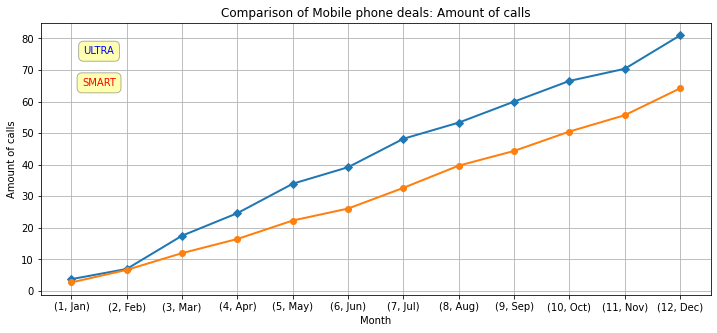

In [53]:
# number calls made by months
compar_results_graph(
df_calls_amount_smart, df_calls_amount_ultra, 
title_graph[0], ylable_graph[0], 
coord_ultra=(0.5,75), coord_smart=(0.5,65))

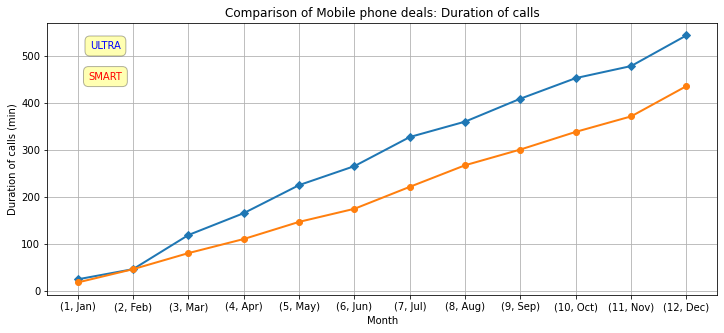

In [54]:
# number minutes spent by months
compar_results_graph(
df_calls_duration_smart, df_calls_duration_ultra, 
title_graph[1], ylable_graph[1], 
coord_ultra=(0.5,515), coord_smart=(0.5,450))

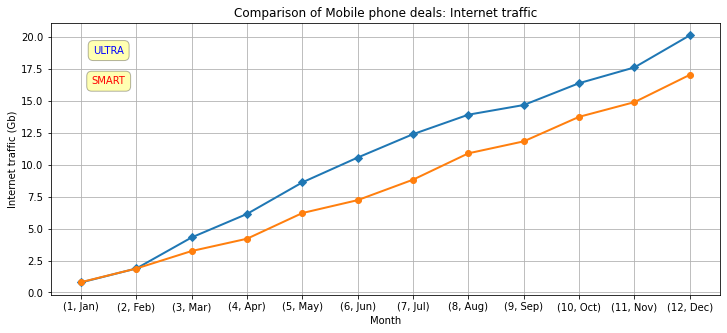

In [55]:
# internet traffic spent by months (Gb)
compar_results_graph(
df_internet_amount_smart, df_internet_amount_ultra, 
title_graph[2], ylable_graph[2], 
coord_ultra=(0.5,18.7), coord_smart=(0.5,16.3))

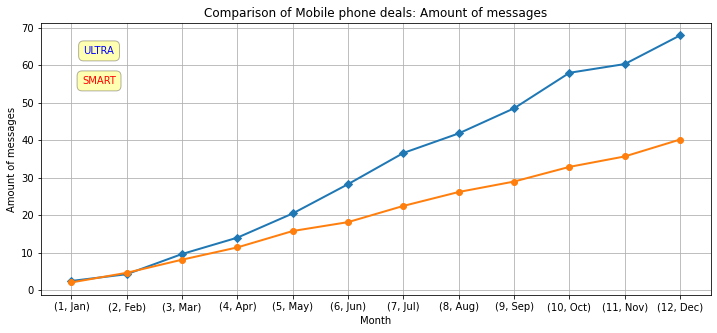

In [56]:
# number of text messages sent by months
compar_results_graph(
df_messages_amount_smart, df_messages_amount_ultra, 
title_graph[3], ylable_graph[3], 
coord_ultra=(0.5,63), coord_smart=(0.5,55))

***

Comparison of revenue of the provider for both tariffs

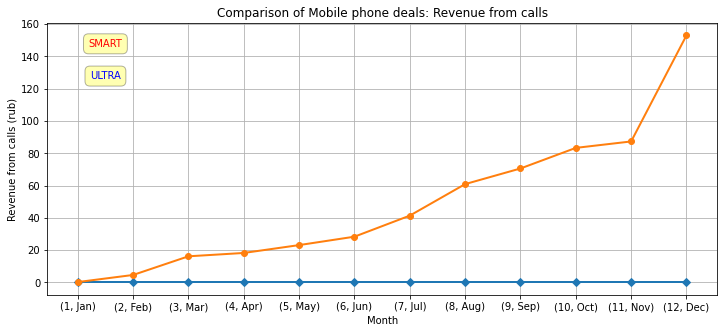

In [57]:
# monthly revenue from call
compar_results_graph(
df_revenue_calls_smart, df_revenue_calls_ultra, 
title_graph[4], ylable_graph[4], 
coord_ultra=(0.5,126), coord_smart=(0.5,146))

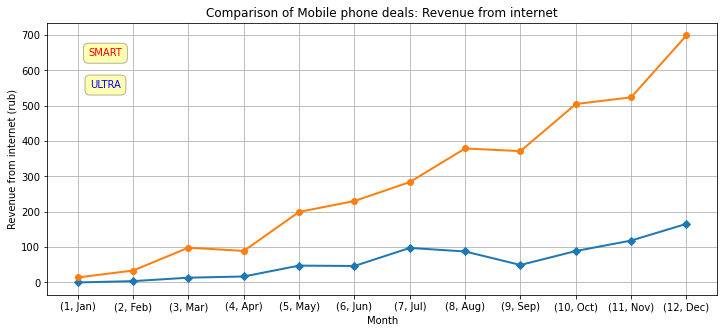

In [58]:
# monthly revenue from internet traffic
compar_results_graph(
df_revenue_internet_smart, df_revenue_internet_ultra, 
title_graph[5], ylable_graph[5], 
coord_ultra=(0.5,550), coord_smart=(0.5,640))

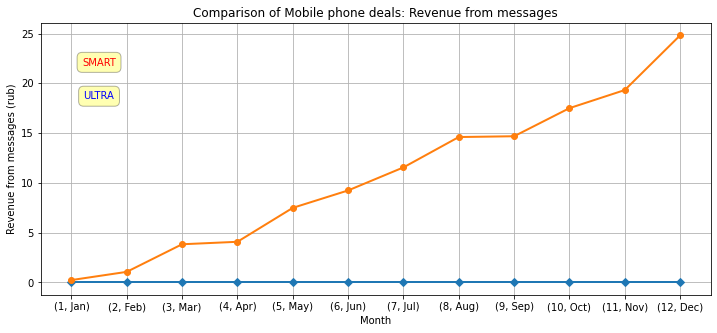

In [59]:
# monthly revenue from text messages
compar_results_graph(
df_revenue_messages_smart, df_revenue_messages_ultra, 
title_graph[6], ylable_graph[6], 
coord_ultra=(0.5,18.4), coord_smart=(0.5,21.8))

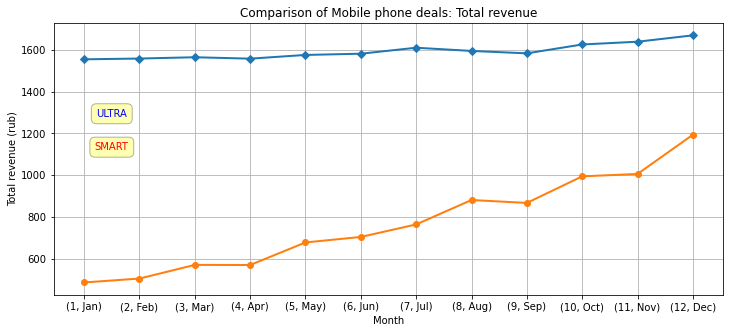

In [60]:
# monthly total revenue 
compar_results_graph(
df_revenue_total_smart, df_revenue_total_ultra, 
title_graph[7], ylable_graph[7], 
coord_ultra=(0.5,1280), coord_smart=(0.5,1120))

***

Calculation of statistical parameters for tariffs

In [88]:
# global variable for entering the text
opt = [
'number of calls', 
'duration of calls', 
'internet traffic',  
'number of messages', ]

# calculation  of statistical parameters of datase
class StatParam:

     def __init__ (self, data):
          self.data = data

     #------------------------------------------------------------------------------------------
     # calculation of the average per month
     def avg_calc(self, select, type):
          value_avg = round(self.data.iloc[:, -1].mean())
          return value_avg
     
     # print out the average per month
     def avg_print(self, select, type):
          value_avg = round(self.data.iloc[:, -1].mean())
          text = 'Average {} for "{}" mobile tarif: {}'.format(select, type, value_avg)
          print(text)
     #------------------------------------------------------------------------------------------
     
     #------------------------------------------------------------------------------------------
     # calculation of variance per month
     def var_calc(self, select, type):
          value_var = round(self.data.iloc[:, -1].var())
          return value_var
          
     # print out the variance per month
     def var_print(self, select, type):
          value_var = round(self.data.iloc[:, -1].var())
          text = 'Variance of {} for "{}" mobile tariff: {}'.format(select, type, value_var)
          print(text)            
     #------------------------------------------------------------------------------------------
     
     #------------------------------------------------------------------------------------------
     # calculation of standard deviation per month 
     def std_calc(self, select, type):
          value_std = round(self.data.iloc[:, -1].std())
          return value_std
          
     # print out the standard deviation per month
     def std_print(self, select, type):
          value_std = round(self.data.iloc[:, -1].std())
          text = 'Standard deviation of {} for "{}" mobile tarif: {}'.format(select, type, value_std)
          print(text)            
     #------------------------------------------------------------------------------------------

In [86]:
# print out averages
StatParam(df_users_calls_amt_smart).avg_print(opt[0], df_tariffs.loc[0, 'tariff_name'])
StatParam(df_users_calls_amt_ultra).avg_print(opt[0], df_tariffs.loc[1, 'tariff_name'])
print('-------------------------------------------------------------') 
StatParam(df_users_calls_dur_smart).avg_print(opt[1], df_tariffs.loc[0, 'tariff_name'])
StatParam(df_users_calls_dur_ultra).avg_print(opt[1], df_tariffs.loc[1, 'tariff_name'])
print('-------------------------------------------------------------') 
StatParam(df_users_internet_smart).avg_print(opt[2], df_tariffs.loc[0, 'tariff_name'])
StatParam(df_users_internet_ultra).avg_print(opt[2], df_tariffs.loc[1, 'tariff_name'])
print('-------------------------------------------------------------')
StatParam(df_users_messages_smart).avg_print(opt[3], df_tariffs.loc[0, 'tariff_name'])
StatParam(df_users_messages_ultra).avg_print(opt[3], df_tariffs.loc[1, 'tariff_name'])
print('-------------------------------------------------------------')  

Average number of calls for "smart" mobile tarif: 36
Average number of calls for "ultra" mobile tarif: 49
-------------------------------------------------------------
Average duration of calls for "smart" mobile tarif: 245
Average duration of calls for "ultra" mobile tarif: 335
-------------------------------------------------------------
Average internet traffic for "smart" mobile tarif: 10
Average internet traffic for "ultra" mobile tarif: 12
-------------------------------------------------------------
Average number of messages for "smart" mobile tarif: 24
Average number of messages for "ultra" mobile tarif: 39
-------------------------------------------------------------


In [89]:
# print out variances 
StatParam(df_users_calls_amt_smart).var_print(opt[0], df_tariffs.loc[0, 'tariff_name'])
StatParam(df_users_calls_amt_ultra).var_print(opt[0], df_tariffs.loc[1, 'tariff_name'])
print('--------------------------------------------------------') 
StatParam(df_users_calls_dur_smart).var_print(opt[1], df_tariffs.loc[0, 'tariff_name'])
StatParam(df_users_calls_dur_ultra).var_print(opt[1], df_tariffs.loc[1, 'tariff_name'])
print('--------------------------------------------------------')
StatParam(df_users_internet_smart).var_print(opt[2], df_tariffs.loc[0, 'tariff_name'])
StatParam(df_users_internet_ultra).var_print(opt[2], df_tariffs.loc[1, 'tariff_name'])
print('--------------------------------------------------------')
StatParam(df_users_messages_smart).var_print(opt[3], df_tariffs.loc[0, 'tariff_name'])
StatParam(df_users_messages_ultra).var_print(opt[3], df_tariffs.loc[1, 'tariff_name'])
print('--------------------------------------------------------')  

Variance of number of calls for "smart" mobile tariff: 533
Variance of number of calls for "ultra" mobile tariff: 1244
--------------------------------------------------------
Variance of duration of calls for "smart" mobile tariff: 24173
Variance of duration of calls for "ultra" mobile tariff: 56965
--------------------------------------------------------
Variance of internet traffic for "smart" mobile tariff: 30
Variance of internet traffic for "ultra" mobile tariff: 66
--------------------------------------------------------
Variance of number of messages for "smart" mobile tariff: 454
Variance of number of messages for "ultra" mobile tariff: 1049
--------------------------------------------------------


In [90]:
# print out standard deviations
StatParam(df_users_calls_amt_smart).std_print(opt[0], df_tariffs.loc[0, 'tariff_name'])
StatParam(df_users_calls_amt_ultra).std_print(opt[0], df_tariffs.loc[1, 'tariff_name'])
print('-------------------------------------------------------------------') 
StatParam(df_users_calls_dur_smart).std_print(opt[1], df_tariffs.loc[0, 'tariff_name'])
StatParam(df_users_calls_dur_ultra).std_print(opt[1], df_tariffs.loc[1, 'tariff_name'])
print('-------------------------------------------------------------------') 
StatParam(df_users_internet_smart).std_print(opt[2], df_tariffs.loc[0, 'tariff_name'])
StatParam(df_users_internet_ultra).std_print(opt[2], df_tariffs.loc[1, 'tariff_name'])
print('-------------------------------------------------------------------')
StatParam(df_users_messages_smart).std_print(opt[3], df_tariffs.loc[0, 'tariff_name'])
StatParam(df_users_messages_ultra).std_print(opt[3], df_tariffs.loc[1, 'tariff_name'])
print('-------------------------------------------------------------------')  

Standard deviation of number of calls for "smart" mobile tarif: 23
Standard deviation of number of calls for "ultra" mobile tarif: 35
-------------------------------------------------------------------
Standard deviation of duration of calls for "smart" mobile tarif: 155
Standard deviation of duration of calls for "ultra" mobile tarif: 239
-------------------------------------------------------------------
Standard deviation of internet traffic for "smart" mobile tarif: 6
Standard deviation of internet traffic for "ultra" mobile tarif: 8
-------------------------------------------------------------------
Standard deviation of number of messages for "smart" mobile tarif: 21
Standard deviation of number of messages for "ultra" mobile tarif: 32
-------------------------------------------------------------------


In [65]:
# min and max number of calls for 'Smart' mobile tariff
calls_amt_smart_min = df_users_calls_amt_smart['calls_amount_avg'].min() 
calls_amt_smart_max = df_users_calls_amt_smart['calls_amount_avg'].max()

# min and max duration of calls for 'Smart' mobile tariff 
calls_dur_smart_min = df_users_calls_dur_smart['calls_duration_avg'].min() 
calls_dur_smart_max = df_users_calls_dur_smart['calls_duration_avg'].max() 

# min and max internet traffic for 'Smart' mobile tariff
internet_smart_min = df_users_internet_smart['internet_avg'].min() 
internet_smart_max = df_users_internet_smart['internet_avg'].max() 

# min and max number of messages for 'Smart' mobile  tariff
messages_smart_min = df_users_messages_smart['messages_avg'].min() 
messages_smart_max = df_users_messages_smart['messages_avg'].max() 

###########################################################################

# minand max number of calls for 'Ultra' mobile tariff 
calls_amt_ultra_min = df_users_calls_amt_ultra['calls_amount_avg'].min() 
calls_amt_ultra_max = df_users_calls_amt_ultra['calls_amount_avg'].max() 

# min and max duration of calls for 'Ultra' mobile tariff 
calls_dur_ultra_min = df_users_calls_dur_ultra['calls_duration_avg'].min() 
calls_dur_ultra_max = df_users_calls_dur_ultra['calls_duration_avg'].max() 

# mina d max internet traffic for 'Ultra' mobile tariff
internet_ultra_min = df_users_internet_ultra['internet_avg'].min() 
internet_ultra_max = df_users_internet_ultra['internet_avg'].max() 

# mina d max number of messages for 'Ultra' moobile tariff
messages_ultra_min = df_users_messages_ultra['messages_avg'].min() 
messages_ultra_max = df_users_messages_ultra['messages_avg'].max()

In [66]:
# names of histograms
lable_1 = ['ULTRA', 'Moscow']
lable_2 = ['SMART', 'Regions']

# comparison of histograms of services used by clients     
def compar_results_hist(
    data_smart, smart_min, smart_max,
    data_ultra, ultra_min, ultra_max, 
    column_hist, title_hist, lable_1st, lable_2nd):
    
    ax = data_ultra.plot(
    kind='hist', y=column_hist, histtype='step', bins=30, alpha=0.7, 
    range=(ultra_min, ultra_max), linewidth=4, label=lable_1st)                         
    
    data_smart.plot(
    kind='hist', y=column_hist, histtype='step', bins=30,
    range=(smart_min, smart_max), linewidth=4, alpha=0.7,
    label=lable_2nd, ax=ax, grid=True, legend=True);    
        
    plt.title(title_hist)

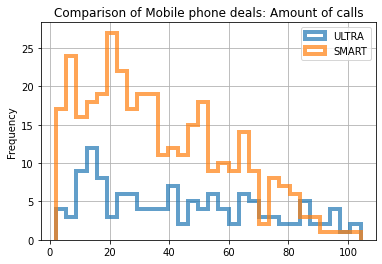

In [67]:
# distribution of number of calls per month
compar_results_hist(
df_users_calls_amt_smart, calls_amt_smart_min, calls_amt_smart_max,
df_users_calls_amt_ultra, calls_amt_smart_min, calls_amt_smart_max, 
columns_avg[0], title_graph[0], lable_1[0], lable_2[0])

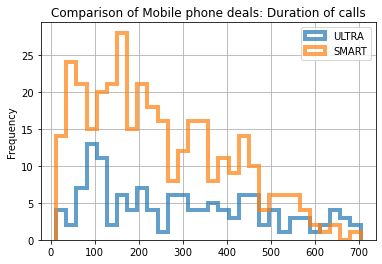

In [68]:
# distribution of duration of calls per month
compar_results_hist(
df_users_calls_dur_smart, calls_dur_smart_min, calls_dur_smart_max,
df_users_calls_dur_ultra, calls_dur_smart_min, calls_dur_smart_max, 
columns_avg[1], title_graph[1], lable_1[0], lable_2[0])

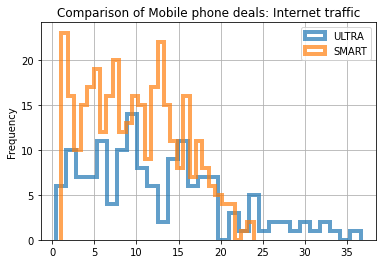

In [69]:
# distribution of internet traffic per month
compar_results_hist(
df_users_internet_smart, internet_smart_min, internet_smart_max,
df_users_internet_ultra, internet_ultra_min, internet_ultra_max, 
columns_avg[2], title_graph[2], lable_1[0], lable_2[0])

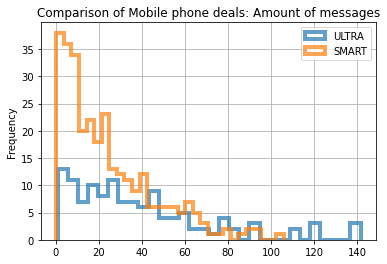

In [70]:
# distribution of text messages per month
compar_results_hist(
df_users_messages_smart, messages_smart_min, messages_smart_max,
df_users_messages_ultra, messages_ultra_min, messages_ultra_max, 
columns_avg[3], title_graph[3], lable_1[0], lable_2[0])

Histograms of the distribution of the number of calls for both tariffs show that mostly customers made from 10 to 30 calls per month. At the same time, the average differs due to the shape of distribution: for the 'smart' tariff - 36 calls, and for the 'ultra' tariff - 49 calls. Also, the standard deviation of the 'ultra' is higher by 12. This is because clients from the 'ultra' tariff made approximately the same number of calls, comparing to  the 'smart' tariff.

The trend for duration of calls remains stable so  that the shape of the distributions is similar to the distribution for number of calls. The longest duration for both tariffs is 100-200 minutes, while the averages for 'smart' and 'ultra' tariffs are 245 and 335 minutes. respectively. Similar to the previous histograms, the standard deviations are very different (155 vs 239).

Despite the fact that, on average, customers used Internet traffic in almost the same way: 10 GB for the 'smart' tariff and 12 GB for the 'ultra' tariff, the distributions of the investigated values ​​differ significantly. The 'smart' tariff shows a normal distribution with a maximum value of 25 GB, while the 'ultra' tariff, on the contrary, is distributed over a larger range of values ​​up to 35 GB without a clearly defined center. At the same time, the difference between the tariffs in the deviation from the average is 25%.

Regarding the number of text messages, clients generally preferred not to use them, communicating via other thpes, since a large frequency on the histograms is located around zero. Although if the whole data is taken into account, the average values ​​per month reach 24 on the 'smart' tariff and 39 on the 'ultra' tariff. The standard deviations differ by about 1.5 times, which indicates different habits of the customers of the presented tariffs. Most of the 'smart' tariff users prefer to use this service not so often, while the 'ultra' users are more diverse in their preferences, which is also evidenced by the smooth distribution of values.

### Step 5. Testing the hypothesis

In [71]:
# average revenue for 'Smart' mobile tariff
users_revenue_smart_anal = round(df_users_revenue_smart_anal['revenue_avg'].mean())
print('Average revenue for "Smart" mobile tariff:', users_revenue_smart_anal)

# average revenue for 'Ultra' mobile  tariff
users_revenue_ultra_anal = round(df_users_revenue_ultra_anal['revenue_avg'].mean())
print('Average revenue for "Utra" mobile tariff:', users_revenue_ultra_anal)

print('----------------------------------------')

# average revenue in Moscow 
users_revenue_msc_anal = round(df_users_revenue_msc_anal['revenue_avg'].mean())
print('Average revenue in Moscow:', users_revenue_msc_anal)

# average revenue in regions
users_revenue_oth_anal = round(df_users_revenue_oth_anal['revenue_avg'].mean())
print('Average revenue in regions:', users_revenue_oth_anal)

Average revenue for "Smart" mobile tariff: 823
Average revenue for "Utra" mobile tariff: 1600
----------------------------------------
Average revenue in Moscow: 1039
Average revenue in regions: 1058


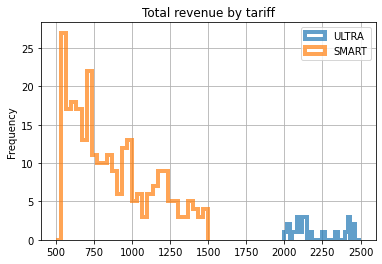

In [72]:
# distribution of the total revenue by mobile tariffs
compar_results_hist(
df_users_revenue_smart_anal, 500, 1500,
df_users_revenue_ultra_anal, 2000, 2500, 
columns_avg[4], title_graph[8], lable_1[0], lable_2[0])

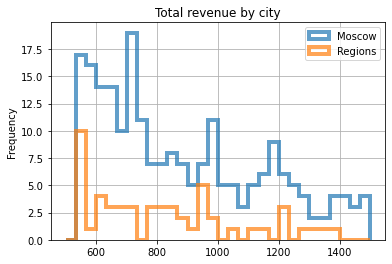

In [73]:
# distribution of the total revenue by location 
compar_results_hist(
df_users_revenue_msc_anal, 500, 1500,
df_users_revenue_oth_anal, 500, 1500, 
columns_avg[4], title_graph[9], lable_1[1], lable_2[1])

In [74]:
# test the equality of averages from two datasets 
def t_test(data_1, data_2):    
    
    # threshold of statistical significance 
    alpha = 0.05 
            
    results = st.ttest_ind(data_1, data_2)

    print('p-value:', results.pvalue)

    if results.pvalue < alpha:
        print('Reject the null hypothesis')
    else:
        print('Accept the alternative hypotisis') 

In [75]:
# test equality of average revenue for mobile tariff 'smart' and 'ultra' 
t_test(df_users_revenue_smart_anal, df_users_revenue_ultra_anal)

p-value: [6.75845801e-34]
Reject the null hypothesis


In [76]:
# test equality of average revenue in Moscow and other regions
t_test(df_users_revenue_msc_anal, df_users_revenue_oth_anal)

p-value: [0.81372232]
Accept the alternative hypotisis


Based on the common practice, the null hypothesis is accepted as the equality of the average values ​​of both dataset. Thus, the alternative hypothesis will be two-sided and specifies that the averag of the two datasets are not equal to each other.

In order to analyze data on tariffs, it is also important to determine whether it makes sense to launch both tariffs if the revenues are equal. If the revenues differ, it will be possible to conclude that one of the tariffs needs to be upgraded to meet customer requests.

As shown by the t-test, when comparing the average revenu ​​for 'smart' and 'ultra' tariffs, the null hypothesis is rejected in favor of the alternative. This means that the averages are not equal. On the contrary, when testing the total revenue for Moscow and the regions, the null hypothesis is not rejected because the means are equal in accordance with the chosen statistical significance threshold alpha equal to 0.05.

### Conclusions

An analysis of the total revenue from the two tariffs showed that the average revenue from the 'ultra' tariff is almost 2 times higher than the 'smart' tariff. At the same time, monthly revenue of the 'smart' tariff is growing rapidly from about 400 rub in January up to 1200 rub  in December, while the 'ultra' tariff is around the value of 1600 rub throughout the year.

By analyzing the sources of revenue, the 'ultra' tariff is mainly paid off by the subscription fee, and also slightly by paying for additional Internet traffic in the amount of 100-200 rubles. per month.

The revenue of the 'smart' tariff is formed proportionally from the payment for services and the subscription fee. As presented on the graphs, the maximum revenue from calls can reach 160 rub, from the Internet 700 rub and from text messages 25 rub. Adding it to a subscription fee of 550 rub/month, potentially it is possible to make a profit of more than 1400 rub, which is close to the 'ultra' tariff.

As the distribution diagrams showed, text messages are not popular among customers of both tariffs. Additionally, the profit from this service is very low ('smart') or zero ('ultra'), so the main focus should be on calls and the Internet. This is especially important for the 'smart' tariff, as the greatest revenue comes from these services.

The next step for optimizing tariffs could be the use of recommender systems and machine learning algorithms to analyze big data coming from users. This will make it possible to more accurately select the values ​​of the provided mobile services based on the statistical data of their use by customers.

a * [Calls amount] + b * [Calls duration] + c * [Internet] + d * [Messages] = [Revenue] 

Where:
* a, b, c, d - coefficients for recommended services
* [Revenue] - average revenu
* [Calls amount] - average number of call
* [Calls duration] - average duration of calls
* [Internet] - average internet traffic 
* [Messages] - average number of messages

Solving the Diophantine equation using the Genetic Optimization Algorithm

In [77]:
# parameters of the initial equation 
class Param():
  # 5 values for initialization : 4 coefficients and result 
  def __init__(self, a=0, b=0, c=0, d=0, res=0, 
               iterations_limit = 50):
    self.a = a
    self.b = b
    self.c = c
    self.d = d
    self.res = res
    self.iterations_limit = iterations_limit

In [78]:
# get a gene with correct  values of a, b, c, d
class Gene():
  # initialization — select an injtial population 
  def __init__(self):
    self.alleles = {}
    self.alleles[0] = 0
    self.alleles[1] = 0
    self.alleles[2] = 0
    self.alleles[3] = 0
    self.fitness = 0
    self.probability = 0.0
  # Identity test
  def __eq__(self, other):
    for i in range(len(self.alleles.keys())):
      if self.alleles[i] != other.alleles[i]:
        return False
    return True    

In [79]:
# solving the initial equationв
class Solver():
  # defenition of size of population
  def __init__(self, param):
    self.param = param
    self.population_size = 500
    self.population = {}
    pass

  # iterative call of main function
  def solve(self):
    global_fitness = None
    self._make_first_generation()
    global_fitness = self._count_fitnesses()
    
    # check: whether resul is obtained using initial population
    if global_fitness == 0:
        return global_fitness
    
    # starting point for epochs
    iterations = 0
    while ((global_fitness != 0)
           or (self.param.iterations_limit != iterations)):
        
        self._count_parent_probability()
        self._make_generation()
        global_fitness = self._count_fitnesses()
        # check
        if global_fitness == 0:
            return global_fitness
        
        iterations += 1        
    return None
  
  # select 5 random solutions for a, b, c, d
  # creation of the first generation
  def _make_first_generation(self):
    for i in range(self.population_size):
      self.population[i] = Gene()
      for j in range(4):  
        self.population[i].alleles[j] = \
        random.randint(1, self.param.res)

  # in order to calculate fitness function coefficients, put each solutio
  # in the expression in the a*x1 + b*x2 + c*x3 + d*x4
  # calculation of coefficients for some gene         
  def _count_fitness(self, gene):
    # desirable result 
    total = self.param.a * gene.alleles[0] \
          + self.param.b * gene.alleles[1] \
          + self.param.c * gene.alleles[2] \
          + self.param.d * gene.alleles[3]
    
    # calculation of the fitness function coefficient as a difference 
    # between desirable and obtained results 
    gene.fitness = abs(total - self.param.res)
    return gene.fitness

  # calculation all coefficients
  def _count_fitnesses(self):
    avgfit = 0
    fitness = 0
    for i in range(self.population_size):
      fitness = self._count_fitness(self.population[i])
      avgfit += fitness
      if fitness == 0:
        return i
    return 0
  
  # sum of inverse coefficients 
  def _inverse_sum(self):
    sum = 0
    for i in range(self.population_size):
        sum += 1.0 / self.population[i].fitness
    return sum

  # fitness of the next generation based on fitness of thr previous;
  # calculated in ratio or percent of the whole number;
  # probabilities of being a parent are generated
  def _count_parent_probability(self):
      inverse_sum = self._inverse_sum()
      procent_factor = 100.0 # или 1.0 
      
      # probability is calculated as a sum of inverse coefficients devided b
      # the value opposit to the coefficient of this value
      for i in range(self.population_size):
        self.population[i].probability = \
        ((1.0 / self.population[i].fitness) / inverse_sum) * procent_factor 

  # get an index of the gene which is a random number between 1 and 100
  def _get_active_index(self):
    val = random.randint(0, 101)
    last = 0
    # check the quality of population 
    for i in range(self.population_size):
      if (last <= val <= self.population[i].probability): 
          return i
      else: 
          last = self.population[i].probability
    return 4

  # each child contains information about previous generation;
  # function returns the gene which is put in temporary population 
  def _make_child(self, p_1, p_2):
    # calculation of crossover of two genes
    crossover = random.randint(1, 3)
    first = random.randint(0, 128)
    child = Gene()
    
    for i in self.population[p_1].alleles:
        child.alleles[i] = self.population[p_1].alleles[i]
        
    initial = 0
    final = 3
    if (first < 64): 
        initial = crossover
    else: 
        final = crossover + 1
    
    for i in range(initial, final):
        
        child.alleles[i] = self.population[p_2].alleles[i]
        # generate a random number which defines crossover;
        # add a smole mutation affecting on crossover: 
        # 5% - probability of appearing a new number 
        if (random.randint(0, 666) < 5):
             child.alleles[i] = random.randint(0, self.param.res)
       
    return child

  # main function - generation of a new population
  def _make_generation(self, iterations_limit = 25):
    # temporary population
    tmp = {}
    
    # create a random population of genes and loop through all genes;
    # by selecting genes they do not have to be the same  
    for i in range(self.population_size):
      parent_1 = 0
      parent_2 = 0
      iterations = 0
      while (parent_1 == parent_2 
            or self.population[parent_1] == self.population[parent_2]):
        
        # when selecting a parent a random number is generated an
        # iterate over all genes until a gene is found
        # containing a number in  _get_active_index
        parent_1 = self._get_active_index()
        parent_2 = self._get_active_index()
        iterations += 1
        # if a number of interactions exceeds the limit any parents are selected
        if (iterations_limit < iterations): 
            break
      
      # when parents are selected they breed: 
      # their indexes are sent (up in the code) to the function of reproduction,
      # a gene is returned which is placed in the temporary population
      tmp[i] = self._make_child(parent_1, parent_2)
    
    for i in range(self.population_size):
      self.population[i] = tmp[i]
  
  # convert into string 
  def __str__(self):
    res = ''
    
    fitness = self.solve()
    if fitness == None:
        return 'There is no solution :('
    
    gene = self.population[fitness]
    
    res += 'Solution of the equation %sa + %sb + %sc + %sd = %s:\n' \
        %(self.param.a, 
          self.param.b, 
          self.param.c, 
          self.param.d, 
          self.param.res)
          
    res += 'a = %s; '%gene.alleles[0] 
    res += 'b = %s; '%gene.alleles[1]
    res += 'c = %s; '%gene.alleles[2]
    res += 'd = %s '%gene.alleles[3]
    				
    return res + '\n'       

In [80]:
# average number of calls for 'Smart' mobile tariff
calls_amt_smart_avg = \
StatParam(df_users_calls_amt_smart).avg_calc(opt[0], df_tariffs.loc[0, 'tariff_name']) 

# average duration of calls for 'Smart' mobile tariff
calls_dur_smart_avg = \
StatParam(df_users_calls_dur_smart).avg_calc(opt[1], df_tariffs.loc[0, 'tariff_name']) 

# average internet traffic for 'Smart' mobile tariff
internet_smart_avg = \
StatParam(df_users_internet_smart).avg_calc(opt[2], df_tariffs.loc[0, 'tariff_name']) 

# average number of text messages for 'Smart' mobile tariff 
messages_smart_avg = \
StatParam(df_users_messages_smart).avg_calc(opt[3], df_tariffs.loc[0, 'tariff_name']) 

In [81]:
def main():
  print (Solver(Param(
  calls_amt_smart_avg, 
  calls_dur_smart_avg, 
  internet_smart_avg, 
  messages_smart_avg, 
  users_revenue_smart_anal
  )))
main()    

Solution of the equation 36a + 245b + 10c + 24d = 823:
a = 338; b = 515; c = 193; d = 376 

